In [3]:
#Importing the packages necessary and the file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
population=pd.read_csv("/Users/ayush/Desktop/Population-Cities.csv")
population = pd.DataFrame(population)

In [4]:
#Cleaning the column by removing negative values
population=population[population['Population']>=0]

In [5]:
#Cleaning the column by removing all NaN values
population["Country Code"] = population["Country Code"].fillna(0)

In [6]:
population.info()
population.size
population.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14668 entries, 0 to 15631
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14668 non-null  int64  
 1   Serial No        14668 non-null  int64  
 2   Name             13477 non-null  object 
 3   ASCII Name       13481 non-null  object 
 4   Alternate Names  11055 non-null  object 
 5   Country Code     14668 non-null  object 
 6   Country name EN  13487 non-null  object 
 7   Population       14668 non-null  int64  
 8   Timezone         13487 non-null  object 
 9   LABEL EN         13487 non-null  object 
 10  Latitude         13504 non-null  float64
 11  Longitude        13484 non-null  float64
 12  Date             14668 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.6+ MB


(14668, 13)

In [7]:
#Generating a random sample of 50 rows out of the entire population for efficient, cogent and simple visualization
df=population.sample(n=50,replace=False)

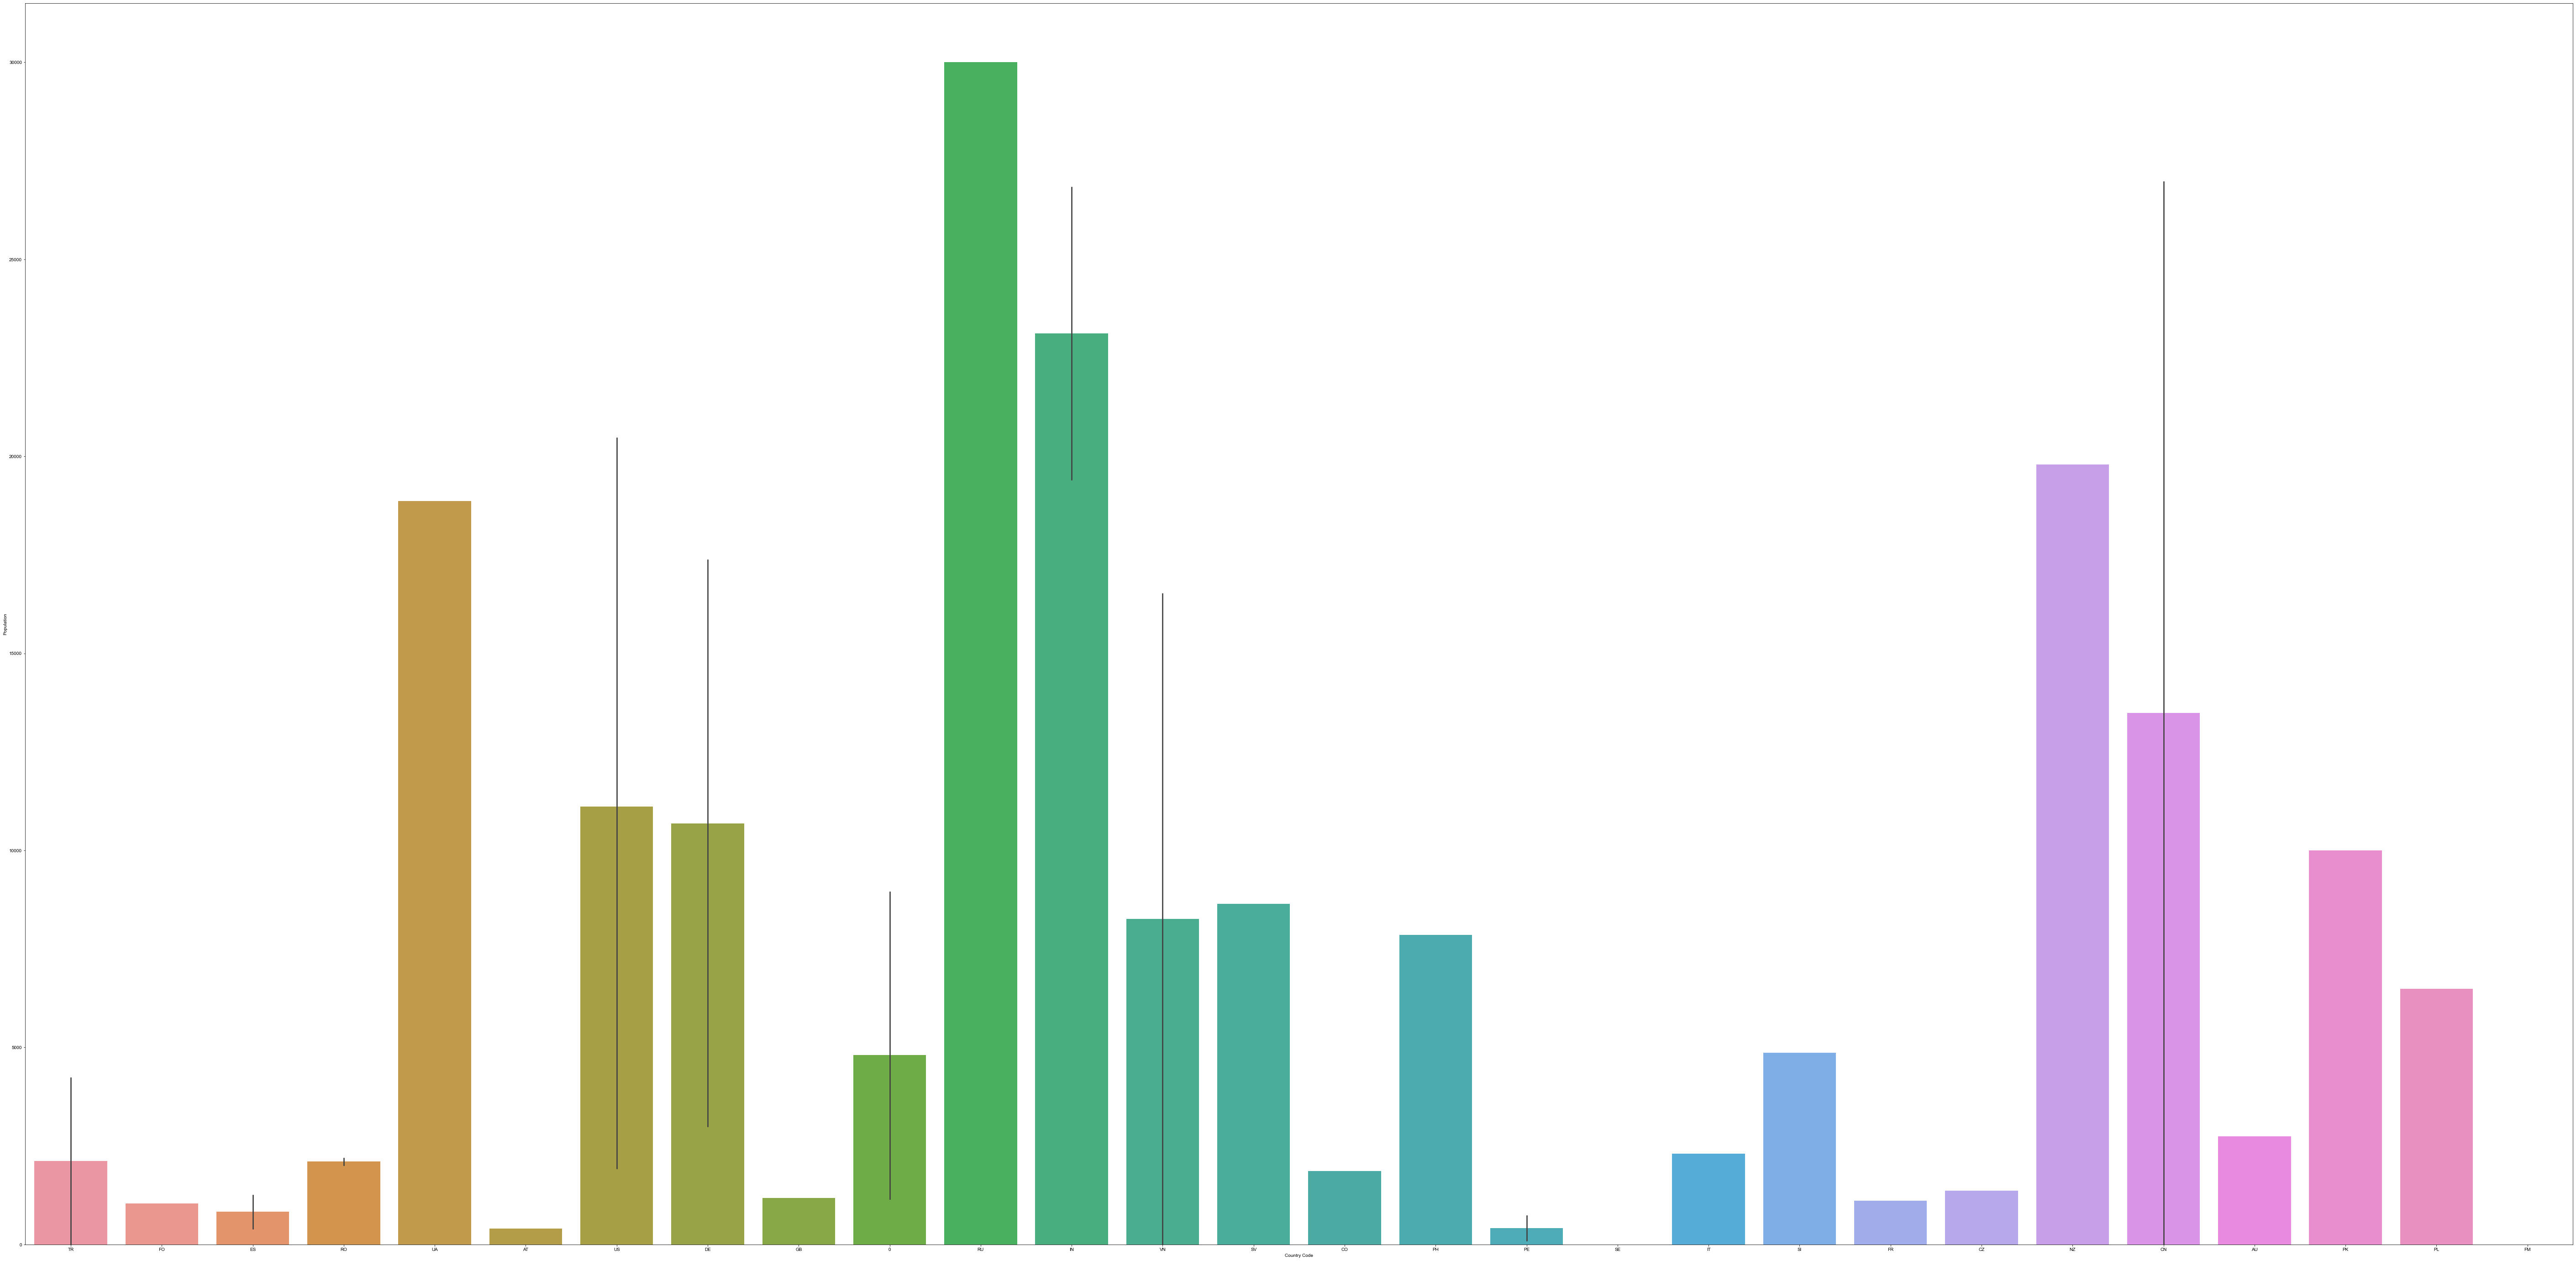

In [8]:
#Generating a BarPlot
plt.figure(figsize=(100,50))
sea.barplot(x='Country Code',y='Population',data=df)
sea.set(font_scale=3.5)

In [9]:
#Generating a BoxPlot
plt.figure(figsize=(200,110))
sea.boxplot(y="Population",x='Country name EN',data=df)
sea.set(font_scale=7)

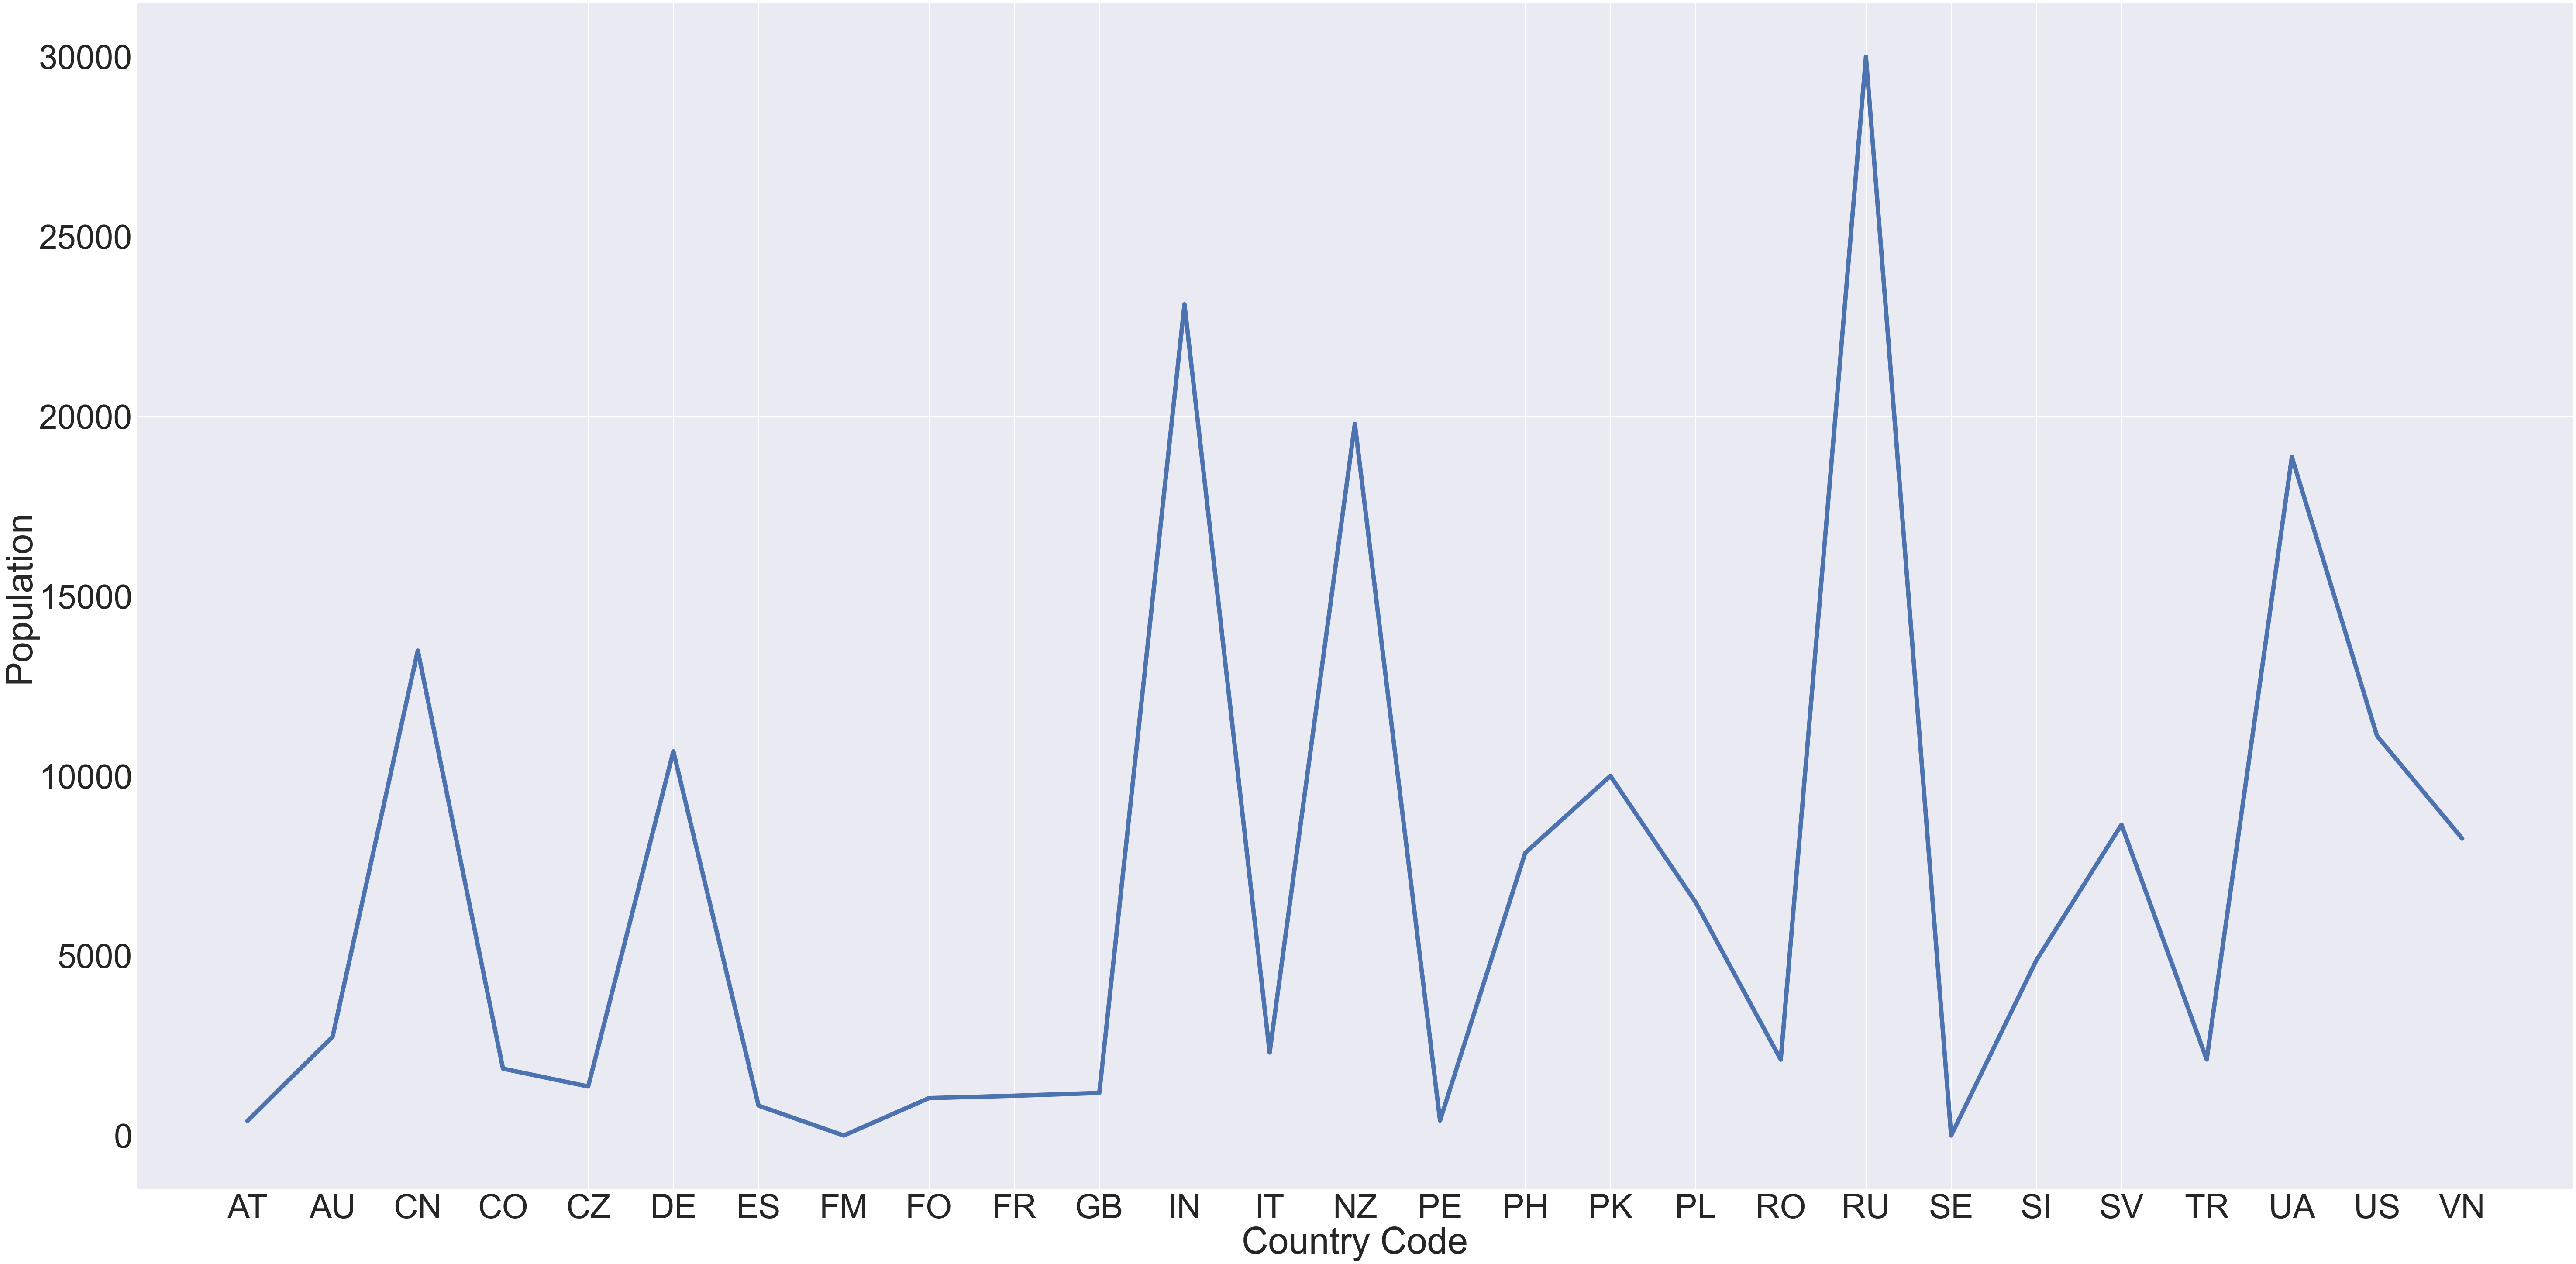

In [10]:
#Generating a LineGraph of Country Code vs Avg Population
#Step 1: Removing Unwanted Colummns
#Step 2: Grouping Values by Country Code and Population
#Step 3: Removing Incorrect Values
#Step 4:Plotting the Graph
df.drop(df[df['Country Code']==0].index, inplace = True)
plot_df=df.groupby('Country Code')['Population'].mean()
plt.figure(figsize=(100,50))
sea.lineplot(data=plot_df,linewidth=10)
sea.set(font_scale=10)

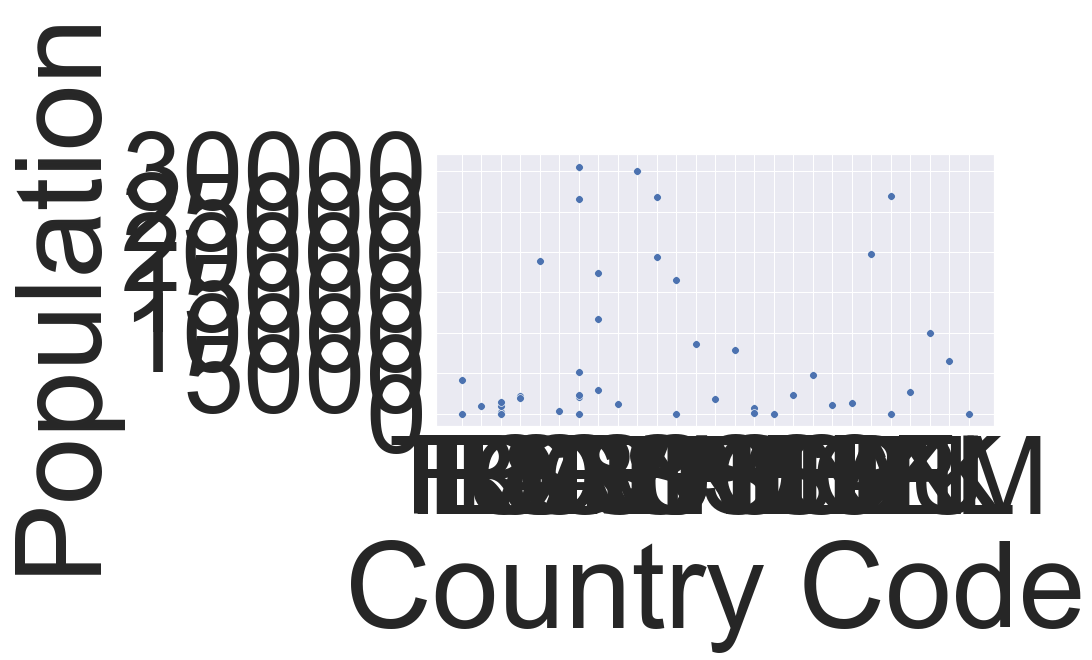

In [11]:
#Generating a scatterplot of Country Code vs Population from the Sample 
plt.figure(figsize=(10,5))
sea.scatterplot(data=df,x='Country Code',y='Population',s=60)
sea.set(font_scale=1)

In [12]:
#Generating a Histogram for counting the number of countries in the sample set 
plt.figure(figsize=(250,150))
sea.histplot(x='LABEL EN',data=df)
sea.set(font_scale=8)

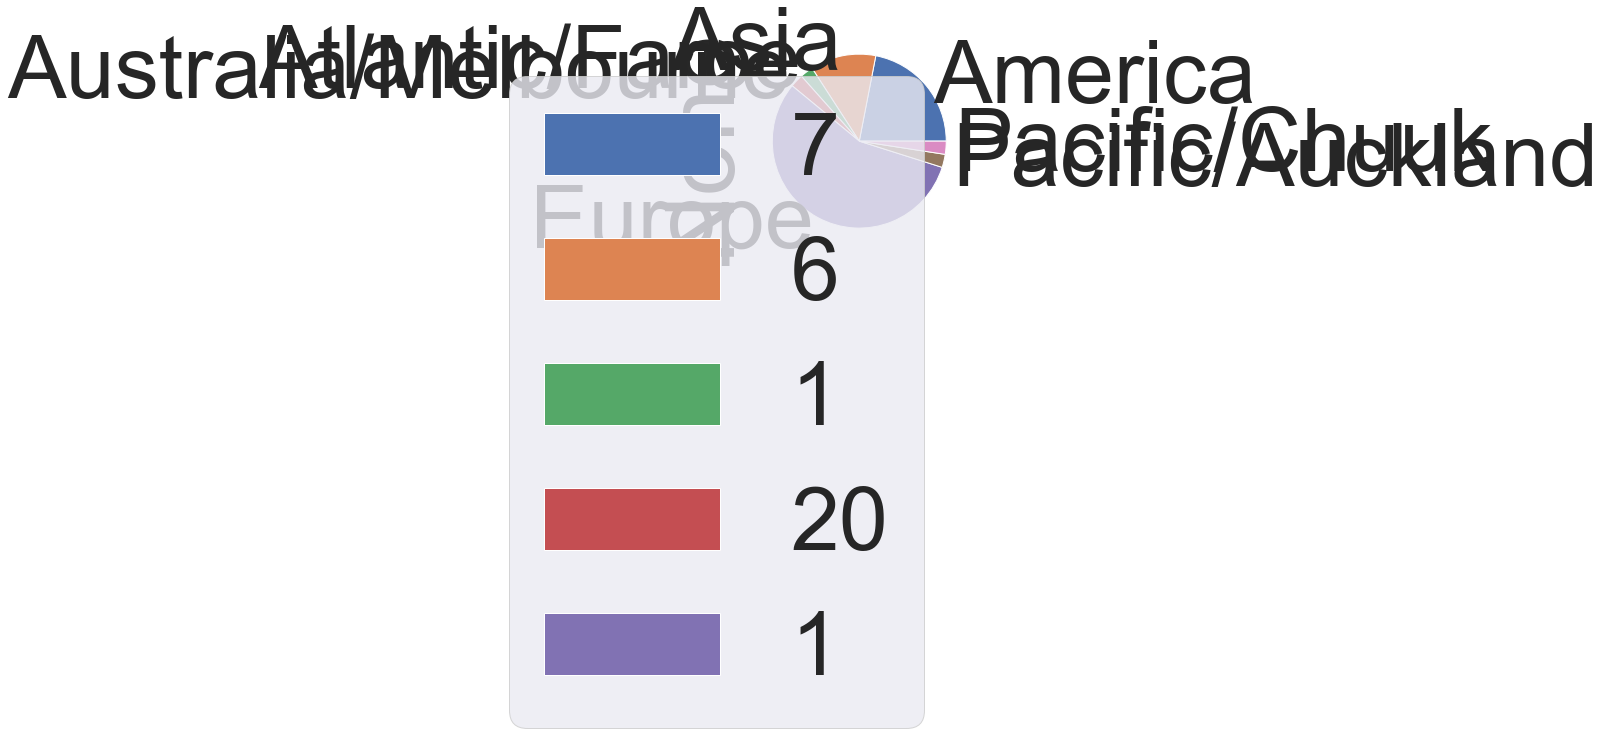

In [13]:
#Generating a PieChart
#Grouping individual cities by a single continent 
df=df.replace('^.*Europe.*$','Europe',regex=True)
df=df.replace('^.*Asia.*$','Asia',regex=True)
df=df.replace('^.*America.*$','America',regex=True)
df.groupby(by = "Timezone").size().plot(kind = "pie")
plt.legend(['7','6','1','20','1'])
sea.set(font_scale=1)

In [14]:
#Generating a heatmap of the total population of a particular region in a particular year
#Extracting the 'population year' from 'population data'
#This heatmap is based on the entire population and not on the sample
population['year']= population['Date'].apply(lambda x:str(x)[:4])
# summarizing the population according to country code and year.
Population_by_year = population.groupby(['Country Code','year'],as_index=False)['Population'].sum()
Population_by_year
Population_value = Population_by_year.pivot('Country Code','year','Population')
plt.figure(figsize=(300,250))
Population_value
sea.heatmap(data=Population_value,linewidths=1, cmap='YlOrRd')
sea.set(font_scale=10)